In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
import scipy.stats as stats
import warnings;
warnings.filterwarnings('ignore');

In [2]:
resources_folder = "./"
output_folder = "./output_figures/"

In [3]:
# Read in cost of living data
cost_of_living_df = pd.read_csv(f"{resources_folder}/cost_of_living_data.csv",index_col="City",
                                encoding="utf-8")
cost_of_living_df.columns

Index(['Meal, Inexpensive Restaurant ',
       'Meal for 2 People, Mid-range Restaurant, Three-course Meal, Inexpensive Restaurant',
       'McMeal at McDonalds (or Equivalent Combo Meal)',
       'Domestic Beer (1 pint draught)', 'Imported Beer (12 oz small bottle)',
       'Cappuccino (regular)', 'Coke/Pepsi (12 oz small bottle)',
       'Water (12 oz small bottle)', 'Milk (regular), (1 gallon)',
       'Loaf of Fresh White Bread (1 lb)', 'Rice (white), (1 lb) ',
       'Eggs (regular) (12)', 'Local Cheese (1 lb)',
       'Chicken Breasts (Boneless, Skinless), (1 lb)',
       'Beef Round (1 lb) (or Equivalent Back Leg Red Meat)', 'Apples (1 lb)',
       'Banana (1 lb)', 'Oranges (1 lb)', 'Tomato (1 lb)', 'Potato (1 lb)',
       'Onion (1 lb)', 'Lettuce (1 head)', 'Water (1.5 liter bottle)',
       'Bottle of Wine (Mid-Range)', 'Domestic Beer (0.5 liter bottle)',
       'Imported Beer (12 oz small bottle).1', 'Cigarettes 20 Pack (Marlboro)',
       'One-way Ticket (Local Transport)', 

In [4]:
cost_of_living_df

,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course Meal, Inexpensive Restaurant",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (1 pint draught),Imported Beer (12 oz small bottle),Cappuccino (regular),Coke/Pepsi (12 oz small bottle),Water (12 oz small bottle),"Milk (regular), (1 gallon)",Loaf of Fresh White Bread (1 lb),...,1 Pair of Nike Running Shoes (Mid-Range),1 Pair of Men Leather Business Shoes,Apartment (1 bedroom) in City Centre,Apartment (1 bedroom) Outside of Centre,Apartment (3 bedrooms) in City Centre,Apartment (3 bedrooms) Outside of Centre,Price per Square Feet to Buy Apartment in City Centre,Price per Square Feet to Buy Apartment Outside of Centre,Average Monthly Net Salary (After Tax),"Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate"
City,,,,,,,,,,,,,,,,,,,,,
Atlanta,15.0,50.0,7.00,5.0,6.00,3.94,1.79,1.60,3.14,2.47,...,73.26,91.91,1474.70,1053.33,2684.62,1707.14,300.04,129.82,3746.22,4.27
Boston,15.0,69.0,8.00,6.0,7.21,3.88,1.86,1.49,3.20,2.49,...,77.68,95.19,2367.32,1756.95,4048.29,2765.18,922.44,393.84,4218.65,4.28
Chicago,15.0,65.0,7.00,5.0,6.00,4.09,1.82,1.61,2.75,2.36,...,78.20,113.53,1741.03,1125.29,3257.66,1982.69,338.02,183.54,3860.47,4.32
Houston,15.0,65.0,7.29,5.0,6.00,4.23,1.80,1.45,2.96,2.00,...,69.03,87.91,1341.52,883.06,2542.16,1637.62,191.79,100.56,3498.15,4.25
Los Angeles,15.0,70.0,7.50,6.0,7.00,4.42,2.32,1.79,3.99,2.77,...,79.47,107.57,2133.97,1633.41,3860.91,2922.74,690.17,417.08,3824.32,4.37
New York,20.0,80.0,9.00,7.0,8.00,4.38,2.07,1.69,4.43,3.46,...,87.87,128.32,3122.07,2003.74,6468.45,3511.42,1279.28,574.65,4546.67,4.35
Philadelphia,15.0,60.0,7.00,5.0,6.00,3.92,1.83,1.22,4.10,2.98,...,72.69,88.17,1577.48,1026.79,2844.05,1608.25,303.66,105.74,3108.73,4.31
Seattle,15.0,62.5,9.00,6.0,6.00,4.27,1.93,1.53,3.18,2.90,...,82.16,114.40,1981.92,1521.60,3599.90,2562.26,654.13,402.16,4631.83,4.36
San Francisco,15.0,80.0,8.00,6.0,7.00,4.45,2.27,1.93,4.25,3.44,...,86.29,136.29,3366.36,2736.89,5743.88,4356.71,1163.16,893.36,6145.51,4.32


In [5]:
# sort the city names
cost_of_living_df.sort_index(axis="index",inplace=True)

In [6]:
cost_of_living_df

,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course Meal, Inexpensive Restaurant",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (1 pint draught),Imported Beer (12 oz small bottle),Cappuccino (regular),Coke/Pepsi (12 oz small bottle),Water (12 oz small bottle),"Milk (regular), (1 gallon)",Loaf of Fresh White Bread (1 lb),...,1 Pair of Nike Running Shoes (Mid-Range),1 Pair of Men Leather Business Shoes,Apartment (1 bedroom) in City Centre,Apartment (1 bedroom) Outside of Centre,Apartment (3 bedrooms) in City Centre,Apartment (3 bedrooms) Outside of Centre,Price per Square Feet to Buy Apartment in City Centre,Price per Square Feet to Buy Apartment Outside of Centre,Average Monthly Net Salary (After Tax),"Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate"
City,,,,,,,,,,,,,,,,,,,,,
Atlanta,15.0,50.0,7.00,5.0,6.00,3.94,1.79,1.60,3.14,2.47,...,73.26,91.91,1474.70,1053.33,2684.62,1707.14,300.04,129.82,3746.22,4.27
Boston,15.0,69.0,8.00,6.0,7.21,3.88,1.86,1.49,3.20,2.49,...,77.68,95.19,2367.32,1756.95,4048.29,2765.18,922.44,393.84,4218.65,4.28
Chicago,15.0,65.0,7.00,5.0,6.00,4.09,1.82,1.61,2.75,2.36,...,78.20,113.53,1741.03,1125.29,3257.66,1982.69,338.02,183.54,3860.47,4.32
Houston,15.0,65.0,7.29,5.0,6.00,4.23,1.80,1.45,2.96,2.00,...,69.03,87.91,1341.52,883.06,2542.16,1637.62,191.79,100.56,3498.15,4.25
Los Angeles,15.0,70.0,7.50,6.0,7.00,4.42,2.32,1.79,3.99,2.77,...,79.47,107.57,2133.97,1633.41,3860.91,2922.74,690.17,417.08,3824.32,4.37
New York,20.0,80.0,9.00,7.0,8.00,4.38,2.07,1.69,4.43,3.46,...,87.87,128.32,3122.07,2003.74,6468.45,3511.42,1279.28,574.65,4546.67,4.35
Philadelphia,15.0,60.0,7.00,5.0,6.00,3.92,1.83,1.22,4.10,2.98,...,72.69,88.17,1577.48,1026.79,2844.05,1608.25,303.66,105.74,3108.73,4.31
San Francisco,15.0,80.0,8.00,6.0,7.00,4.45,2.27,1.93,4.25,3.44,...,86.29,136.29,3366.36,2736.89,5743.88,4356.71,1163.16,893.36,6145.51,4.32
Seattle,15.0,62.5,9.00,6.0,6.00,4.27,1.93,1.53,3.18,2.90,...,82.16,114.40,1981.92,1521.60,3599.90,2562.26,654.13,402.16,4631.83,4.36


In [7]:
# Read in Glassdoor job title salary data
glassdoor_job_title_df = pd.read_csv(f"{resources_folder}/glassdoor_job_title_data.csv",
                                encoding="utf-8")
glassdoor_job_title_df.head()

,Metro,Dimension Type,Month,Dimension,Measure,Value,YoY,mnth,yr
0,National,Job Title,2017-06,Software Engineer,Median Base Pay,85880.0,0.028,6,2017
1,National,Job Title,2017-06,Programmer Analyst,Median Base Pay,67889.0,0.026,6,2017
2,National,Job Title,2017-06,Consultant,Median Base Pay,71306.0,0.006,6,2017
3,National,Job Title,2017-06,Project Manager,Median Base Pay,72571.0,0.004,6,2017
4,National,Job Title,2017-06,Store Manager,Median Base Pay,48199.0,0.028,6,2017


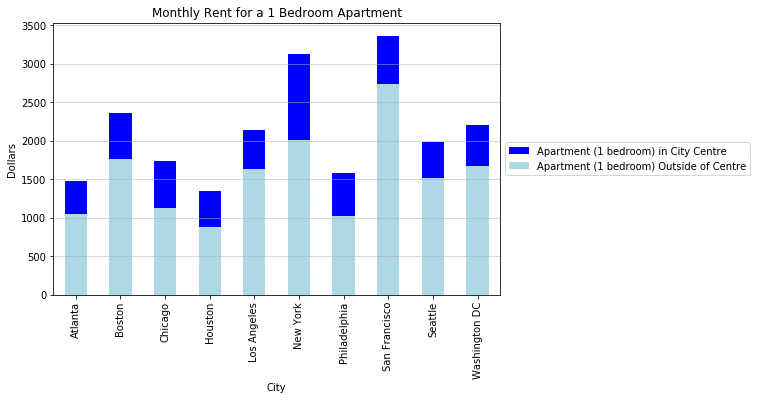

In [8]:
# Monthly Rent for a 1 Bedroom Apartment in the ten cities
plt.figure(figsize=(8,5))  
ax = plt.gca() 
cost_of_living_df.plot(kind='bar',y='Apartment (1 bedroom) in City Centre',color='b',ax=ax)
cost_of_living_df.plot(kind='bar',y='Apartment (1 bedroom) Outside of Centre',color='lightblue',ax=ax)
plt.xlabel("City")
plt.ylabel("Dollars")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.yaxis.grid(linewidth=0.5)
title = "Monthly Rent for a 1 Bedroom Apartment"
plt.title(title)
plt.savefig(f"{output_folder}/{title}.png", dpi=300, bbox_inches = "tight")
plt.show()

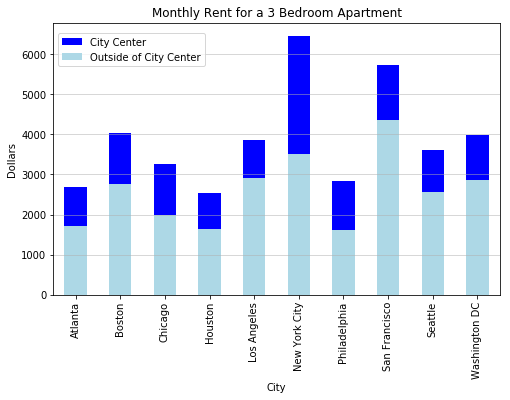

In [55]:
# Monthly Rent for a 3 Bedroom Apartment in the ten cities
plt.figure(figsize=(8,5))  
ax = plt.gca()
cost_of_living_df.plot(kind='bar',y='Apartment (3 bedrooms) in City Centre',
                       label='City Center', color='b',ax=ax)
cost_of_living_df.plot(kind='bar',y='Apartment (3 bedrooms) Outside of Centre',
                       label="Outside of City Center", color='lightblue',ax=ax)
plt.xlabel("City")
plt.ylabel("Dollars")
plt.legend(loc='center left', bbox_to_anchor=(0, 0.9))
ax.yaxis.grid(linewidth=0.5)
title = "Monthly Rent for a 3 Bedroom Apartment"
plt.title(title)
plt.savefig(f"{output_folder}/{title}.png", dpi=300, bbox_inches="tight")
plt.show()

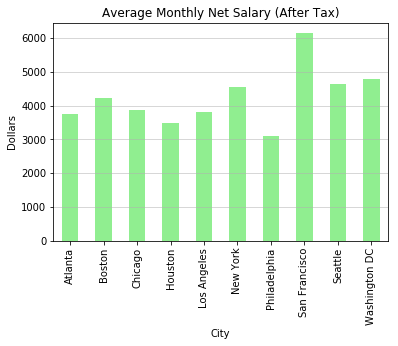

In [10]:
# Average Monthly Net Salary (After Tax)
cost_of_living_df.plot(kind='bar',y='Average Monthly Net Salary (After Tax)',
                       color='lightgreen',legend=False)
plt.ylabel("Dollars")
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(axis='y',linewidth=0.5)
title="Average Monthly Net Salary (After Tax)"
plt.title(title)
plt.savefig(f"{output_folder}/{title}.png", dpi=300, bbox_inches="tight")
plt.show()

In [11]:
# Add a column that has monthly salary based on annual salary
glassdoor_job_title_df["Monthly"] = glassdoor_job_title_df["Value"]/12
# Created a column with Date object for plotting purposes
glassdoor_job_title_df['Date'] = [datetime.strptime(month, '%Y-%m') for month in glassdoor_job_title_df['Month']]
glassdoor_job_title_df.head()

,Metro,Dimension Type,Month,Dimension,Measure,Value,YoY,mnth,yr,Monthly,Date
0,National,Job Title,2017-06,Software Engineer,Median Base Pay,85880.0,0.028,6,2017,7156.666667,2017-06-01
1,National,Job Title,2017-06,Programmer Analyst,Median Base Pay,67889.0,0.026,6,2017,5657.416667,2017-06-01
2,National,Job Title,2017-06,Consultant,Median Base Pay,71306.0,0.006,6,2017,5942.166667,2017-06-01
3,National,Job Title,2017-06,Project Manager,Median Base Pay,72571.0,0.004,6,2017,6047.583333,2017-06-01
4,National,Job Title,2017-06,Store Manager,Median Base Pay,48199.0,0.028,6,2017,4016.583333,2017-06-01


In [12]:
# Median base salary from 2017-06 to 2019-02
#glassdoor_job_title_df["Month"].unique()

In [13]:
# Job titles in the Glassdoor data set
glassdoor_job_title_df["Dimension"].unique()

array(['Software Engineer', 'Programmer Analyst', 'Consultant',
       'Project Manager', 'Store Manager', 'Business Analyst', 'Cashier',
       'Financial Analyst', 'Administrative Assistant', 'Accountant',
       'Sales Representative', 'Professor', 'Registered Nurse',
       'Marketing Manager', 'Operations Manager', 'Product Manager',
       'Sales Manager', 'Teacher', 'Bank Teller',
       'Customer Service Manager', 'Physical Therapist',
       'Mechanical Engineer', 'Recruiter', 'Design Engineer',
       'Pharmacy Technician', 'Graphic Designer', 'Web Developer',
       'Business Development Manager', 'Data Scientist', 'Buyer',
       'Data Analyst', 'Electrical Engineer', 'Attorney',
       'Human Resources Manager', 'Technician', 'Restaurant Cook',
       'Production Manager', 'Manufacturing Engineer',
       'Retail Key Holder', 'Paralegal', 'Java Developer',
       'Warehouse Associate', 'Property Manager', 'Producer',
       'Quality Engineer', 'Operations Analyst', 'Medica

In [14]:
# Number of job titles
#print("There's {0} job titles in the Glassdoor dataset.".format(glassdoor_job_title_df["Dimension"].nunique()))

In [15]:
# Grouped by year and job titles and sorted median base pay by location in descending order
#year_job_location_df = glassdoor_job_title_df.groupby(["yr","Dimension"]).apply(lambda x: (x.groupby('Metro')
#                                       .mean()
#                                       .sort_values('Value', ascending=False))
#                                      .head(11))['Value']

In [16]:
# Glassdoor salary data for 2019 (Most recent)
glassdoor_job_title_2019 = glassdoor_job_title_df[glassdoor_job_title_df["yr"]==2019]

# # Display top 5 highest median base salary in each city
# glassdoor_job_title_2019.groupby("Metro").apply(lambda x: (x.groupby('Dimension')
#                                        .mean()
#                                        .sort_values('Value', ascending=False))
#                                       .head(5))['Value']
# # Display 5 lowest median base salary in each city
# glassdoor_job_title_2019.groupby("Metro").apply(lambda x: (x.groupby('Dimension')
#                                        .mean()
#                                        .sort_values('Value', ascending=False))
#                                       .tail(5))['Value']

<h1>Distribution of Median Base Annual Salary by Select Cities</h1>

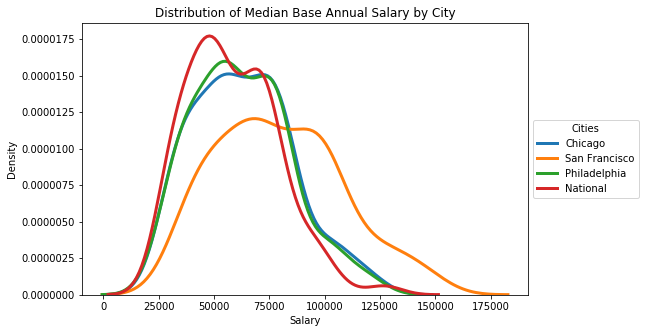

In [17]:
#cities = glassdoor_job_title_2019["Metro"].unique()
select_cities = ["Chicago","San Francisco","Philadelphia","National"]
plt.figure(figsize=(8,5))    
for city in select_cities:
#    subset = glassdoor_job_title_df[glassdoor_job_title_df['Metro'] == city]
    subset = glassdoor_job_title_2019[glassdoor_job_title_2019['Metro'] == city]   
    sns.distplot(subset['Value'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = city)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = 'Cities')
title = 'Distribution of Median Base Annual Salary by City'
plt.xlabel('Salary')
plt.ylabel('Density')

# sns.distplot(glassdoor_job_title_2019['Value'], hist=True, kde=True, 
#              bins=int(180/5), color = 'blue', 
#              hist_kws={'edgecolor':'black'},
#              kde_kws={'linewidth': 2})
plt.title(title)
plt.savefig(f"{output_folder}/{title}.png", dpi=300, bbox_inches = "tight")
plt.show()

<h1>Distribution of Median Base Annual Salary by Job Title</h1>

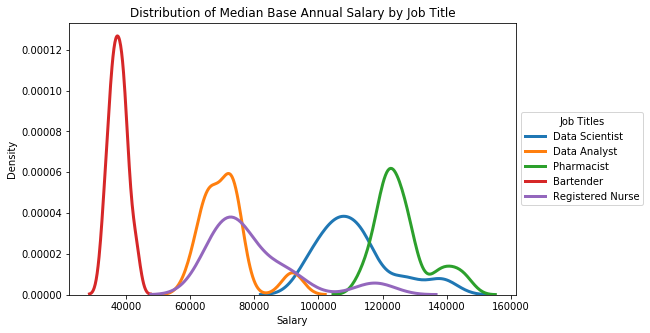

In [18]:
#job_titles = glassdoor_job_title_2019["Dimension"].unique()
job_titles = ["Data Scientist","Data Analyst","Pharmacist","Bartender","Registered Nurse"]

plt.figure(figsize=(8,5))
for job in job_titles:
#    subset = glassdoor_job_title_df[glassdoor_job_title_df['Dimension'] == job]
    subset = glassdoor_job_title_2019[glassdoor_job_title_2019['Dimension'] == job]
    
    sns.distplot(subset['Value'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = job)
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = 'Job Titles')
title = 'Distribution of Median Base Annual Salary by Job Title'
plt.xlabel('Salary')
plt.ylabel('Density')

# sns.distplot(glassdoor_job_title_2019['Value'], hist=True, kde=True, 
#              bins=int(180/5), color = 'blue', 
#              hist_kws={'edgecolor':'black'},
#              kde_kws={'linewidth': 2})
plt.title(title)
plt.savefig(f"{output_folder}/{title}.png", dpi=300, bbox_inches = "tight")
plt.show()

In [19]:
# Grouped by Job Title and by Location
df_2019 = glassdoor_job_title_2019.groupby(["Dimension"]).apply(lambda x: (x.groupby('Metro')
                                      .mean())
                                      .head(11))['Monthly']

In [20]:
job_title_interest = "Data Scientist"
#job_title_interest = "Data Analyst"
df_2019[job_title_interest]

Metro
Atlanta           8293.541667
Boston            9319.666667
Chicago           8681.375000
Houston           9140.916667
Los Angeles       9708.208333
National          8030.166667
New York City     9481.625000
Philadelphia      8695.833333
San Francisco    11538.291667
Seattle          10569.791667
Washington DC     8910.583333
Name: Monthly, dtype: float64

In [21]:
# Rename New York to New York City to match both datasets
cost_of_living_df.rename(index={'New York': 'New York City'},inplace=True)
#national = df_2019[job_title_interest]['National']
df_2019_cities = df_2019[job_title_interest].drop("National")
#cost_of_living_df["Apartment (1 bedroom) in City Centre"]
rent_percent = cost_of_living_df["Apartment (1 bedroom) in City Centre"]/df_2019_cities
rent_percent_out = cost_of_living_df["Apartment (1 bedroom) Outside of Centre"]/df_2019_cities
rent_percent = rent_percent.append(rent_percent_out)

In [22]:
rent_percent

City
Atlanta          0.177813
Boston           0.254013
Chicago          0.200548
Houston          0.146760
Los Angeles      0.219811
New York City    0.329276
Philadelphia     0.181406
San Francisco    0.291755
Seattle          0.187508
Washington DC    0.248126
Atlanta          0.127006
Boston           0.188521
Chicago          0.129621
Houston          0.096605
Los Angeles      0.168250
New York City    0.211329
Philadelphia     0.118078
San Francisco    0.237201
Seattle          0.143957
Washington DC    0.187257
dtype: float64

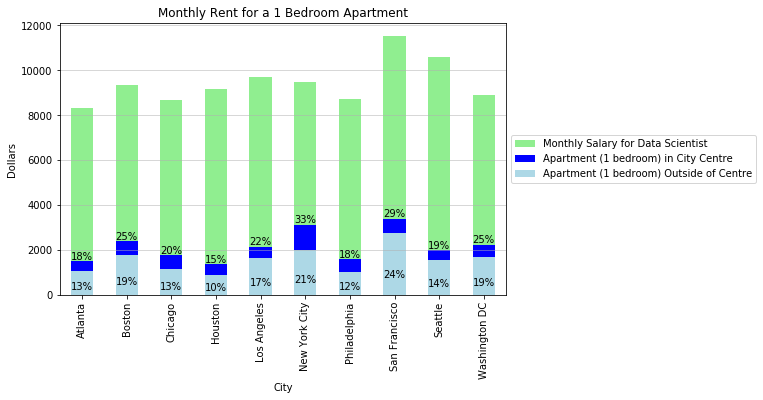

In [24]:
plt.figure(figsize=(8,5))
ax = plt.gca()
df_2019_cities.plot(kind='bar',y=('Salary for {0}').format(job_title_interest),
                                 label =('Monthly Salary for {0}').format(job_title_interest), color='lightgreen',ax=ax)
cost_of_living_df.plot(kind='bar',y='Apartment (1 bedroom) in City Centre',color='b',ax=ax)
cost_of_living_df.plot(kind='bar',y='Apartment (1 bedroom) Outside of Centre',color='lightblue',ax=ax)
plt.xlabel("City")
plt.ylabel("Dollars")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.yaxis.grid(linewidth=0.5)
#ax.get_children()[2].set_color('green')

cnt = 0
rects = ax.patches[10:32]
labels = rent_percent
for rect, label in zip(rects, labels):
    height = rect.get_height()
    if cnt < 10:
        ax.text(rect.get_x() + rect.get_width() / 2, height, '{:.0%}'.format(label),
            ha='center', va='bottom')
    else:
        ax.text(rect.get_x() + rect.get_width() / 2, height/3, '{:.0%}'.format(label),
           ha='center', va='center')
    cnt = cnt +1
title = "Monthly Rent for a 1 Bedroom Apartment"
plt.title(title)
plt.savefig(f"{output_folder}/{title}.png", dpi=300, bbox_inches="tight")
plt.show()

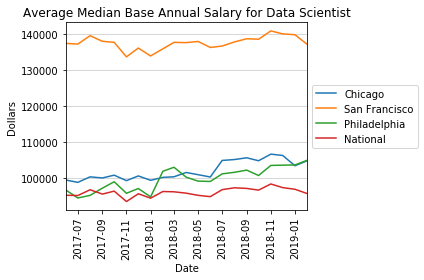

In [25]:
#timeseries for <job title> and <location>
job_title_interest = "Data Scientist"
#job_title_interest = "Accountant"

job_df = glassdoor_job_title_df[glassdoor_job_title_df['Dimension']==job_title_interest]
#select_cities = job_df["Metro"].unique()
select_cities = ["Chicago","San Francisco","Philadelphia","National"]
#job_df_group = job_df.groupby(["Metro"])['Value']
#job_df_group.plot()
fig, ax = plt.subplots()
for metro in select_cities:
    df = job_df[job_df["Metro"]==metro]
    plt.plot(df["Date"],df["Value"],label=metro)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Date")
plt.xticks(rotation=90)
plt.xlim(min(df["Date"]),max(df["Date"]))
plt.ylabel("Dollars")
plt.grid(axis='y',linewidth=0.5)
title = "Average Median Base Annual Salary for {0}".format(job_title_interest)
plt.title(title)
plt.tight_layout()
plt.savefig(f"{output_folder}/{title}.png", dpi=300)
plt.show()

In [26]:
# top five job titles with highest median base pay
top_five = glassdoor_job_title_df.groupby(["Metro","yr"]).apply(lambda x: (x.groupby('Dimension')
                                      .mean()
                                      .sort_values('Value', ascending=False))#)['Value']
                                     .head(5))['Value']

In [27]:
# top five job titles with highest median base pay in Chicago 2017-2019
top_five['Chicago']

yr    Dimension          
2017  Pharmacist             120487.285714
      Solutions Architect    109848.857143
      Attorney               106832.714286
      Tax Manager            103066.571429
      Data Scientist          99965.857143
2018  Pharmacist             120629.416667
      Attorney               113901.666667
      Solutions Architect    113249.916667
      Tax Manager            104378.833333
      Data Scientist         103068.333333
2019  Pharmacist             121928.000000
      Solutions Architect    116839.500000
      Attorney               112117.000000
      Data Scientist         104176.500000
      Tax Manager            103218.000000
Name: Value, dtype: float64

In [28]:
# Average median base pay for listed job titles grouped by year and city\
job_year_location = glassdoor_job_title_df.groupby(["Dimension","yr","Metro"])['Value'].mean()
#job_year_location

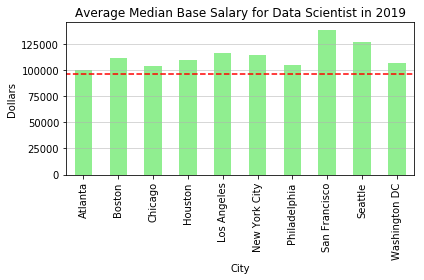

In [29]:
# Average median base salary for <job title> in <year> 
job_title_interest = 'Data Scientist'
year_interest = 2019

national = job_year_location[job_title_interest][year_interest]['National']
job_year_location_new = job_year_location[job_title_interest][year_interest].drop('National')
#job_year_location[job_title_interest][year_interest].plot(kind="bar",color='b')
job_year_location_new.plot(kind="bar",color='lightgreen')
plt.xlabel("City")
plt.ylabel("Dollars")
plt.hlines(national,xmin=-1,xmax=10,colors='r',linestyles='dashed')
plt.grid(axis='y',linewidth=0.5)
title = "Average Median Base Salary for {0} in {1}".format(job_title_interest,year_interest)
plt.title(title)
plt.tight_layout()
plt.savefig(f"{output_folder}/{title}.png", dpi=300)
plt.show()

<h1>An attempt at some statistical tests</h1>

In [30]:
# Compares the salaries for two cities

In [31]:
cityA = "Chicago"
cityB = "Philadelphia"
cityA_2019 = glassdoor_job_title_2019[glassdoor_job_title_2019['Metro']==cityA]
cityA_201901 = cityA_2019[cityA_2019['Month']=="2019-01"]
cityB_2019 = glassdoor_job_title_2019[glassdoor_job_title_2019['Metro']==cityB]
cityB_201901 = cityB_2019[cityB_2019['Month']=="2019-01"]

In [32]:
#print(cityA_201901['Value'].mean())
#print(cityB_201901['Value'].mean())

In [33]:
# compares the salaries for two cities based on the 85 job titles
#stats.ttest_rel(cityA_201901['Value'],cityB_201901['Value'])

In [34]:
# dataframe that maps the city name to its row number
get_city_row = pd.DataFrame({'City' : cost_of_living_df.index, 
    'Index' : pd.Series(np.arange(0,10))} )
get_city_row = get_city_row.set_index('City')
get_city_row = get_city_row.T

In [35]:
# gets the row number of the cities of interest
cityA_ind = get_city_row[cityA][0]
cityB_ind = get_city_row[cityB][0]

In [36]:
# compares across all the variables of cost of living
#stats.ttest_rel(cost_of_living_df.iloc[cityA_ind].values, cost_of_living_df.iloc[cityB_ind].values)

In [37]:
#print(cost_of_living_df.iloc[cityA_ind,47:52].values.mean())
#print(cost_of_living_df.iloc[cityB_ind,47:52].values.mean())

In [38]:
# compares the rent and apartment price variables of cost of living
housing_t, housing_p = stats.ttest_rel(cost_of_living_df.iloc[cityA_ind,47:52].values, cost_of_living_df.iloc[cityB_ind,47:52].values)

#Don't need this anymore. Converted to monthly in the data clean up process.
#rename the column to monthly
#cost_of_living_df["International Primary School, Yearly for 1 Child"] = cost_of_living_df["International Primary School, Yearly for 1 Child"]/12

# compares the restaurant variables of cost of living
restaurant_t, restaurant_p = stats.ttest_rel(cost_of_living_df.iloc[cityA_ind,0:8].values, cost_of_living_df.iloc[cityB_ind,0:8].values)

# compares the food/market variables of cost of living
groceries_t, groceries_p = stats.ttest_rel(cost_of_living_df.iloc[cityA_ind,8:27].values, cost_of_living_df.iloc[cityB_ind,8:27].values)

# compares the transportation variables of cost of living
transportation_t, transportation_p = transportation_t, transportation_p = stats.ttest_rel(cost_of_living_df.iloc[cityA_ind,28:35].values, cost_of_living_df.iloc[cityB_ind,28:35].values)

# compares the monthly utilities
utilities_t, utilities_p = stats.ttest_rel(cost_of_living_df.iloc[cityA_ind,35:38].values, cost_of_living_df.iloc[cityB_ind,35:38].values)

# compares the sports and leisure variables
leisure_t, leisure_p = stats.ttest_rel(cost_of_living_df.iloc[cityA_ind,38:41].values, cost_of_living_df.iloc[cityB_ind,38:41].values)

# compares the childcare variables
childcare_t, childcare_p = stats.ttest_rel(cost_of_living_df.iloc[cityA_ind,41:43].values, cost_of_living_df.iloc[cityB_ind,41:43].values)

# compares the clothings and accessories variables
clothing_t, clothing_p = stats.ttest_rel(cost_of_living_df.iloc[cityA_ind,43:47].values, cost_of_living_df.iloc[cityB_ind,43:47].values)

In [39]:
# Place test results into a data frame
city_compare_vars=["Housing","Restaurants","Groceries","Transportation","Utilities","Leisure","Childcare","Clothing"]
city_compare_tests = pd.DataFrame(np.array([[housing_t, housing_p], 
                                             [restaurant_t, restaurant_p],
                                             [groceries_t, groceries_p],
                                             [transportation_t, transportation_p],
                                             [utilities_t, utilities_p], 
                                             [leisure_t, leisure_p],
                                             [childcare_t, childcare_p], 
                                             [clothing_t, clothing_p]]),
                                             columns=["statistic","p-value"], index=city_compare_vars)
city_compare_tests

,statistic,p-value
Housing,2.876601,0.045167
Restaurants,1.124071,0.298048
Groceries,-2.485608,0.022985
Transportation,-1.015662,0.348982
Utilities,-1.454755,0.282973
Leisure,0.321668,0.778211
Childcare,-0.987988,0.503847
Clothing,2.725473,0.072215


In [40]:
cityA_housing_mean = cost_of_living_df.iloc[cityA_ind,47:52].values.mean()
cityA_restaurants = 4*cost_of_living_df.iloc[cityA_ind,0:8].values.sum()
cityA_groceries = 4*cost_of_living_df.iloc[cityA_ind,8:27].values.sum()
cityA_transportation = cost_of_living_df.iloc[cityA_ind,28:33].values.mean()
cityA_utilities_sum = cost_of_living_df.iloc[cityA_ind,35:38].values.sum()
cityA_leisure_sum = cost_of_living_df.iloc[cityA_ind,38:41].values.sum()
cityA_childcare_mean = cost_of_living_df.iloc[cityA_ind,41:43].values.mean()
#cityA_clothing_sum = cost_of_living_df.iloc[cityA_ind,43:47].values.sum()

cityB_housing_mean = cost_of_living_df.iloc[cityB_ind,47:52].values.mean()
cityB_restaurants = 4*cost_of_living_df.iloc[cityB_ind,0:8].values.sum()
cityB_groceries = 4*cost_of_living_df.iloc[cityB_ind,8:27].values.sum()
cityB_transportation = cost_of_living_df.iloc[cityB_ind,28:33].values.mean()
cityB_utilities_sum = cost_of_living_df.iloc[cityB_ind,35:38].values.sum()
cityB_leisure_sum = cost_of_living_df.iloc[cityB_ind,38:41].values.sum()
cityB_childcare_mean = cost_of_living_df.iloc[cityB_ind,41:43].values.mean()
#cityB_clothing_sum = cost_of_living_df.iloc[cityB_ind,43:47].values.sum()

In [41]:
index_monthly=["Housing","Restaurants","Groceries","Transportation","Utilities","Leisure","Childcare"]

In [42]:
city_compare_living = pd.DataFrame(np.array([[cityA_housing_mean, cityB_housing_mean], 
                                             [cityA_restaurants, cityB_restaurants],
                                             [cityA_groceries, cityB_groceries],
                                             [cityA_transportation, cityB_transportation],
                                             [cityA_utilities_sum, cityB_utilities_sum], 
                                             [cityA_leisure_sum, cityB_leisure_sum],
                                             [cityA_childcare_mean, cityB_childcare_mean]]), 
#                                             [cityA_clothing_mean, cityB_clothing_mean]]),
                                             columns=[cityA,cityB], index=index_monthly)

In [62]:
#city_compare_living

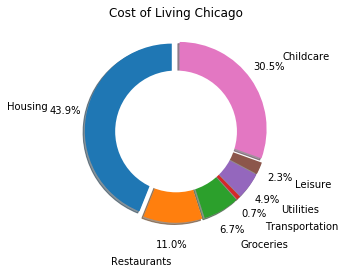

In [60]:
plt.pie(city_compare_living[cityA].values,explode=explode,
        autopct="%1.1f%%",labels=city_compare_living.index,shadow=True,
       startangle=90, pctdistance=1.25, labeldistance=1.45)
centre_circle = plt.Circle((0,0),0.70,fc='white')
title = f"Cost of Living {cityA}"
plt.title(title)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.savefig(f"{output_folder}/{title}.png", dpi=300)
plt.show()

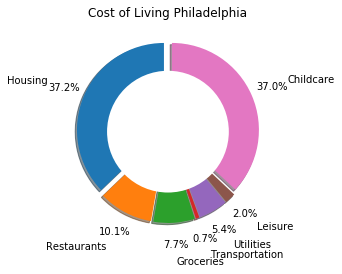

In [61]:
plt.pie(city_compare_living[cityB].values,explode=explode,
        autopct="%1.1f%%",labels=city_compare_living.index,shadow=True,
       startangle=90, pctdistance=1.25, labeldistance=1.45)
centre_circle = plt.Circle((0,0),0.70,fc='white')
title = f"Cost of Living {cityB}"
plt.title(title)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.savefig(f"{output_folder}/{title}.png", dpi=600)
plt.show()

In [56]:
#city_compare_living.plot(kind="bar")
# explode= (0.05,0.05,0.05,0.05,0.05,0.05,0.05)
# f, (ax1,ax2) = plt.subplots(1,2,sharey=True)
# ax1.pie(city_compare_living[cityA].values,explode=explode,
#         autopct="%1.1f%%",labels=city_compare_living.index,shadow=True,
#        startangle=90, pctdistance=0.85)
# centre_circle = plt.Circle((0,0),0.70,fc='white')

# fig = plt.gcf()
# fig.gca().add_artist(centre_circle)

# ax2.pie(city_compare_living[cityB].values,explode=explode,
#         autopct="%1.1f%%",labels=city_compare_living.index,shadow=True,
#        startangle=90, pctdistance=0.5)
# #plt.tight_layout()
# plt.show()

In [ ]:
# plt.pie(city_compare_living[cityA].values,explode=explode,
#         autopct="%1.1f%%",labels=city_compare_living.index,shadow=True,
#        startangle=90, pctdistance=1.25, labeldistance=1.45)
# centre_circle = plt.Circle((0,0),0.70,fc='white')
# fig = plt.gcf()
# fig.gca().add_artist(centre_circle)
# plt.show()


In [ ]:
# Alternative plotting method
# x_axis = np.arange(len(cost_of_living_df.index))
# y_values = cost_of_living_df['Apartment (1 bedroom) in City Centre'].astype(float)
# plt.bar(x_axis, y_values, 
#         color='b', alpha=0.5, align="center")
# tick_locations = [value for value in x_axis]
# plt.xticks(tick_locations, cost_of_living_df.index, rotation="vertical")
# plt.ylim(0, max(y_values)+500)
# plt.xlabel("City")
# plt.ylabel("Apartment (1 bedroom) in City Centre")
# plt.show()

